In [67]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans



In [68]:
# output folder
import os
os.makedirs("./cx_out", exist_ok=True)

In [69]:
# Load data

In [70]:
dataset = datasets.load_iris()

In [71]:
print(dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [72]:
data = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
data['target'] = dataset['target']

In [73]:
print(data.info())
print(data.describe())
print(data.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000        

In [74]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [75]:
## Pair plot

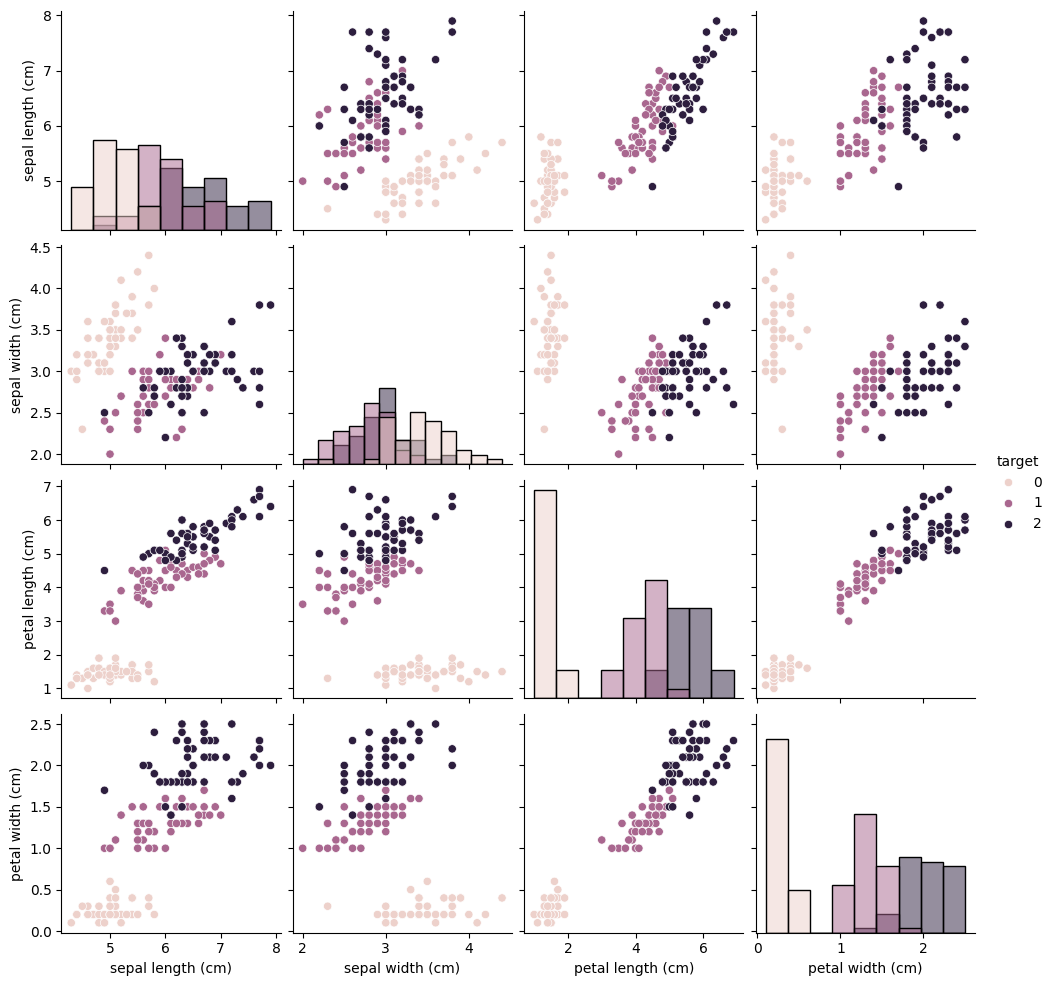

In [76]:
rel1 = sns.pairplot(data, hue='target', diag_kind='hist')
rel1.savefig('./cx_out/pair1.png')

In [77]:
## Push to Class

In [78]:
# define class
class Flower:
    def __init__(self, petal_width, petal_length, sepal_width, sepal_length):
        self.petal_width=petal_width
        self.petal_length=petal_length
        self.sepal_width=sepal_width
        self.sepal_length=sepal_length

    def petal_area(self):
        return self.petal_width * self.petal_length

    def sepal_area(self):
        return self.sepal_width * self.sepal_length

# push data to class
petal_areas = []
sepal_areas = []
for i in range(data.shape[0]):
    flower = Flower(petal_width=data.loc[i,"petal width (cm)"],
                      petal_length=data.loc[i,"petal length (cm)"],
                      sepal_width=data.loc[i,"sepal width (cm)"],
                      sepal_length=data.loc[i,"sepal length (cm)"]
                     )
    petal_area = flower.petal_area().item()
    sepal_area = flower.sepal_area().item()
    petal_areas.append(petal_area)
    sepal_areas.append(sepal_area)


In [82]:
# add columns to df
data["sepal area (cm2)"] = sepal_areas
data["petal area (cm2)"] = petal_areas

In [83]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,sepal area (cm2),petal area (cm2)
0,5.1,3.5,1.4,0.2,0,17.85,0.28
1,4.9,3.0,1.4,0.2,0,14.70,0.28
2,4.7,3.2,1.3,0.2,0,15.04,0.26
3,4.6,3.1,1.5,0.2,0,14.26,0.30
4,5.0,3.6,1.4,0.2,0,18.00,0.28
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,20.10,11.96
146,6.3,2.5,5.0,1.9,2,15.75,9.50
147,6.5,3.0,5.2,2.0,2,19.50,10.40
148,6.2,3.4,5.4,2.3,2,21.08,12.42


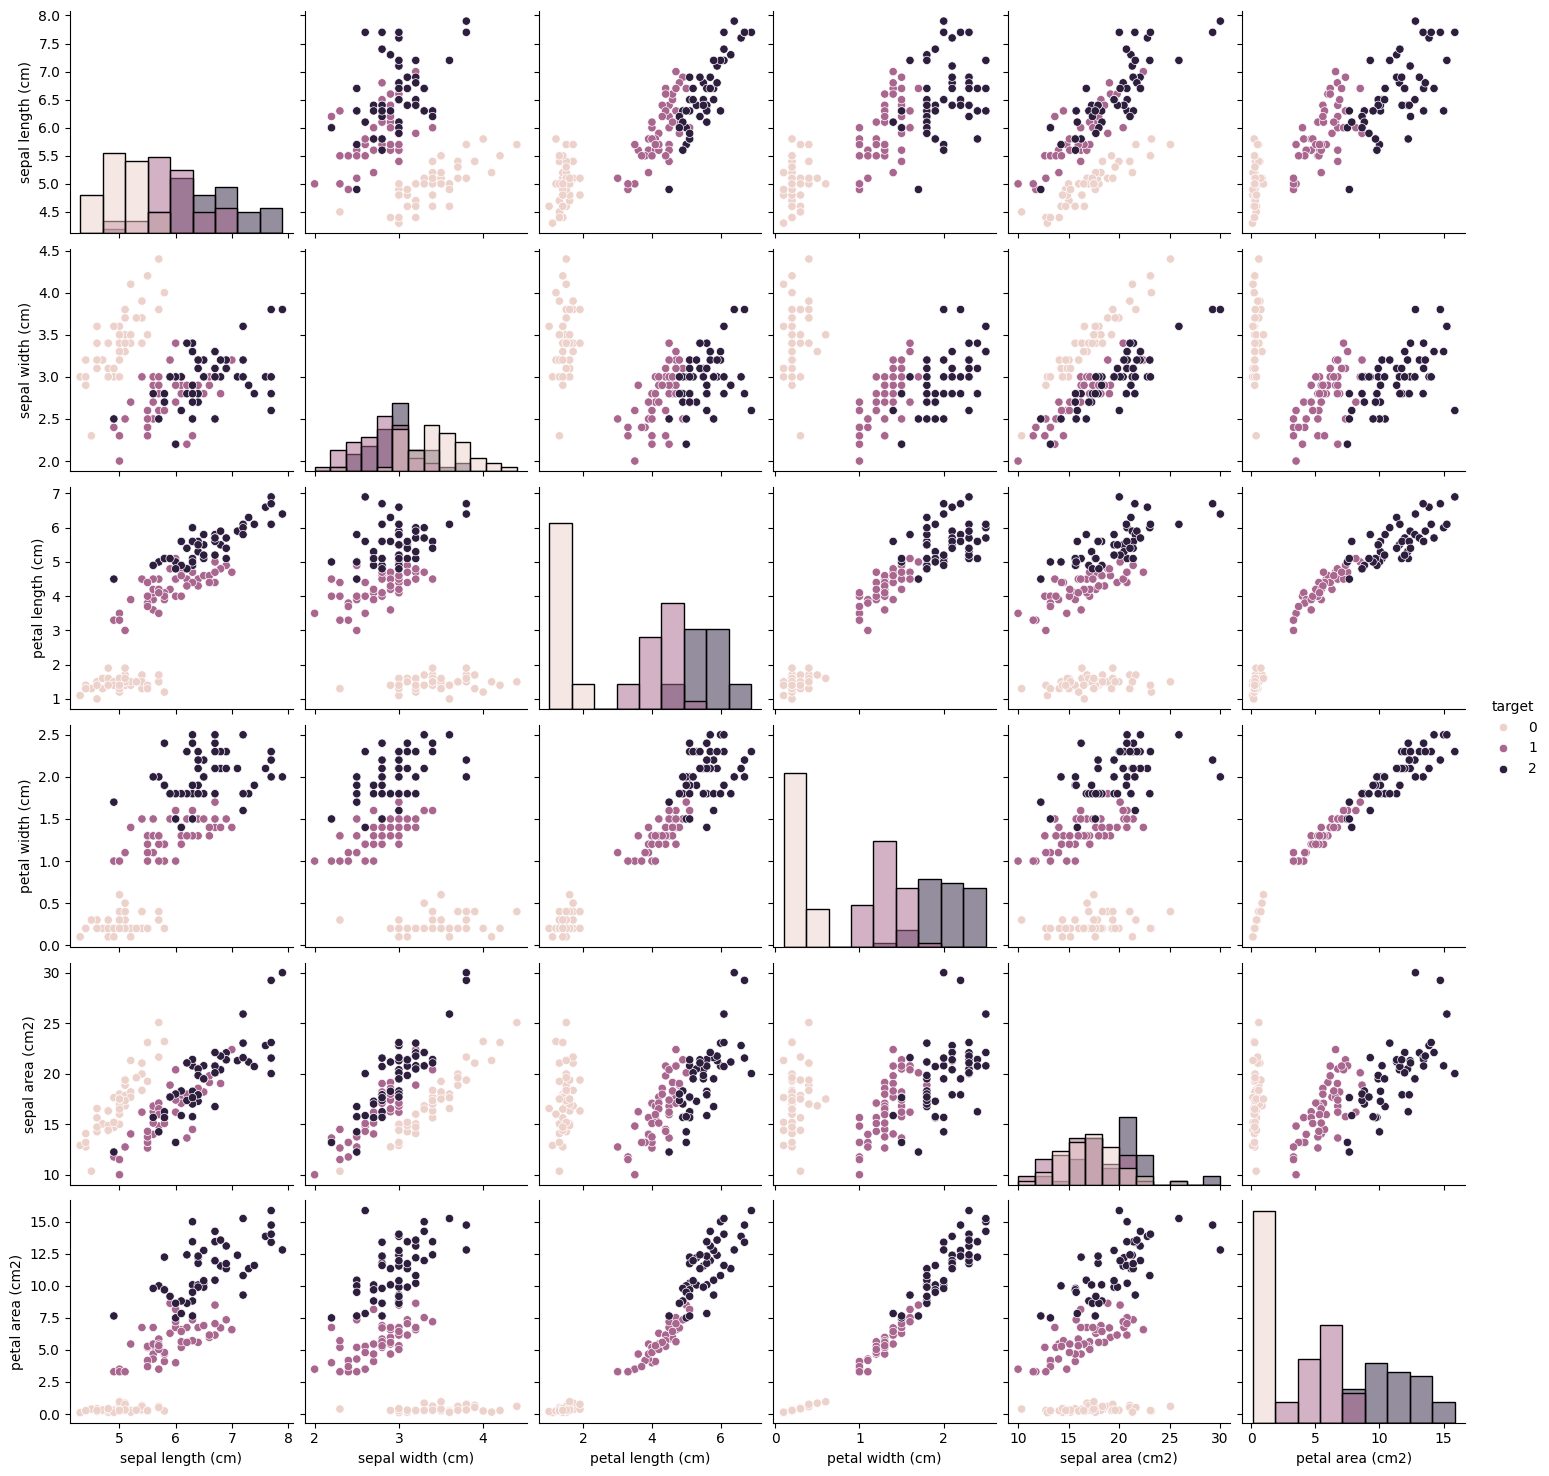

In [84]:
rel2 = sns.pairplot(data, hue='target', diag_kind='hist')
rel2.savefig('./cx_out/pair2.png')

In [86]:
# save to python
!jupyter nbconvert --to script flowers.ipynb

[NbConvertApp] Converting notebook flowers.ipynb to script
[NbConvertApp] Writing 2095 bytes to flowers.py
